In [1]:
!pip install pandas numpy matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
speed_up_stats = pd.DataFrame({
    'apply()': [669420, 630032, 611248, 641719, 665343, 647548, 623182, 613653, 599140, 661378],
    'vectorized': [12440, 34681, 15372, 16550, 11978, 14070, 12201, 12315, 13769, 11792]
})

speed_up_stats['speed up'] = speed_up_stats['apply()'] / speed_up_stats['vectorized']

In [4]:
# LineProfiler gives a timer unit of 1e-6 s/tick, which is 1e-3 ms/tick.
ms_per_tick = 1e-3

# Convert clock cycles to seconds.
speed_up_stats['apply()'] = speed_up_stats['apply()'] * ms_per_tick
speed_up_stats['vectorized'] = speed_up_stats['vectorized'] * ms_per_tick

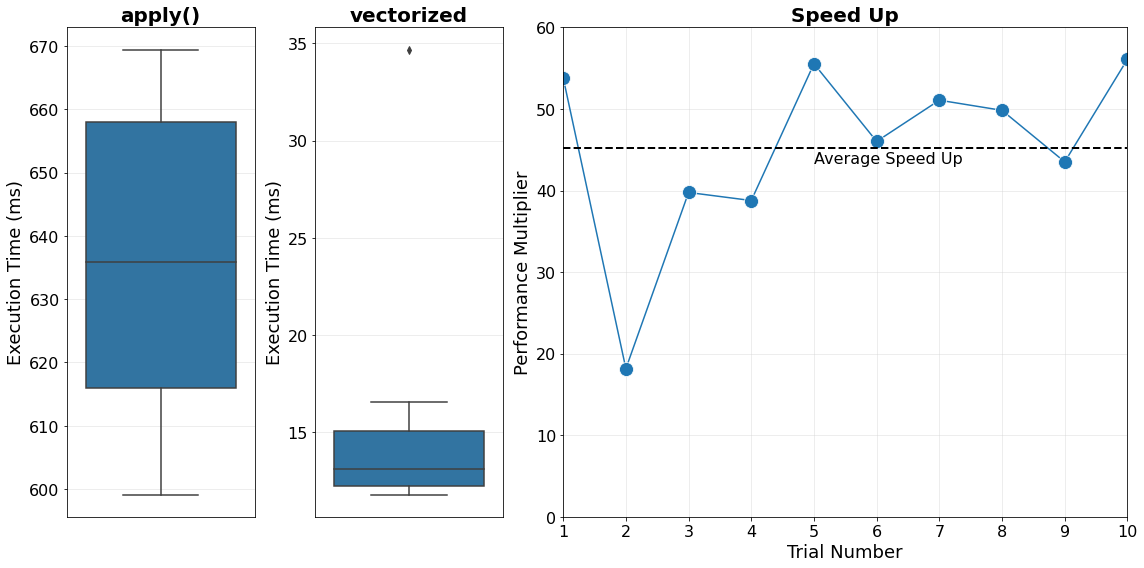

In [5]:
fig1, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16, 8), gridspec_kw={'width_ratios': [1, 1, 3]})

ax1.set_title('apply()', fontweight='bold', fontsize=20)
ax1.set_xlabel('')
ax1.set_ylabel('Execution Time (ms)', fontsize=18)
ax1.set_axisbelow(True)
ax1.xaxis.set_visible(False)
ax1.yaxis.grid(True, alpha=0.5, color='lightgray')
ax1.tick_params(axis='both', labelsize=16)

ax2.set_title('vectorized', fontweight='bold', fontsize=20)
ax2.set_xlabel('')
ax2.set_ylabel('Execution Time (ms)', fontsize=18)
ax2.set_axisbelow(True)
ax2.xaxis.set_visible(False)
ax2.yaxis.grid(True, alpha=0.5, color='lightgray')
ax2.tick_params(axis='both', labelsize=16)

ax3.set_title('Speed Up', fontweight='bold', fontsize=20)
ax3.set_xlabel('Trial Number', fontsize=18)
ax3.set_ylabel('Performance Multiplier', fontsize=18)
ax3.set_xlim(left=1, right=10)
ax3.set_ylim(bottom=0, top=60)
ax3.xaxis.grid(True, alpha=0.5, color='lightgray')
ax3.yaxis.grid(True, alpha=0.5, color='lightgray')
ax3.tick_params(axis='both', labelsize=16)

sns.boxplot(data=speed_up_stats['apply()'], ax=ax1)
sns.boxplot(data=speed_up_stats['vectorized'], ax=ax2)
sns.lineplot(data=speed_up_stats,
             x=speed_up_stats.index + 1,
             y='speed up',
             marker="o",
             markersize=14,
             ax=ax3)

average_speed_up = speed_up_stats['speed up'].mean()
ax3.axhline(y=average_speed_up,
            color='black',
            linestyle='--',
            linewidth=2)
ax3.annotate('Average Speed Up',
             xy=(5, average_speed_up),
             xytext=(0, -16),  # -16 points vertical offset.
             textcoords='offset points',
             horizontalalignment='left',
             verticalalignment='baseline',
             fontsize=16)

fig1.tight_layout()

plt.show()